En el siguiente ejercicio se presenta un set de datos con el que trataremos de clasificar si un cliente es solvente o no a la hora de devolver un crédito solicitado a una entidad bancaria.

Para ponernos en situación pertenecemos al equipo de Data Science de una entidad bancaria y se no pide realizar un modelo que sea capaz de evaluar el riesgo de un cliente cuando nos solicita un crédito a través de una tarjeta de crédito en base al histórico de datos que os pasan desde el equipo de negocio (datos extraidos de kaggle).

A continuación os dejan una breve explicación de en que consiste cada una de las variables del conjunto de datos:

- BAD: 1 = candidato con préstamo incumplido o con mora; 0 = candidato que paga su deuda y no tiene registro negativo
- LOAN: Cantidad de solicitud de préstamo
- MORTDUE: Cantidad adeudada de la hipoteca existente
- VALUE: Valor actual del bien o propiedad
- REASON: DebtCon = consolidación de la deuda; HomeImp = mejoras para el hogar
- JOB: Categorias ocupacionales o profesionales
- YOJ: Años es esu trabajo actual
- DEROG: Número de informes derogados o cancelados importantes
- DELINQ: Número de lineas de crédito morosas
- CLAGE: Antiguedad de la linea de crédito más antigua en meses
- NINQ:Número de consultas crediticas recientes
- CLNO: Número de líneas de crédito
- DEBTINC: Cantidad de los ingresos que se dedica a pagar creditos en porcentaje

En este caso la target de nuestro modelo será **BAD**, el resto las consideraremos variables predictoras.

Que se espera que hagais:

- Análisis descriptivo de los datos (esto ayudará a realizar una mejor elección del modelo a usar)
- Tratamiento y limpieza de los datos
- Prueba y evaluación de diferentes modelos
- Breve explicación de los resultados, justificando la elección final del modelo (no me vale con que es el que mejor métrica tenía)
- Que disfruteis del ejercico :).

In [72]:
import warnings
warnings.filterwarnings("ignore")
from LibreriasClasificadores import *

from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer

In [2]:
df1 = pd.read_csv(r'D:\bootcamp\dsb06rt\mod5-machine-learning-y-deep-learning\29_11_2023\credit_risk.csv')
df1.head(2)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN


In [3]:
print(InfoImports())


#----------------------Liberias de utilidad y necesarias--------------------------#
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#----------------------------------------------------------------------------------#
#-----------------------------Utiles-----------------------------------------------#
from sklearn.model_selection import train_test_split #division del train test
from sklearn.preprocessing import MinMaxScaler # escalador para normalizar os datos
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV # para realizar validacion cruzada
#----------------------------------------------------------------------------------#
#-------------------------Metricas de Clasificadores-------------------------------#
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics impo

In [4]:
print(InfoClasificacion())


VecinosKneighbors --> KNeighborsClassifier
RegresionLogistica --> LogisticRegression
nearestCentroid --> NearestCentroid
ArbolDecision --> DesicionTreeClassifier
ArbolRandom --> RandomForestClassifier

---------- Parametros---------------
Importante: Para todas los parametros son en comun y en el mismo orden solo en ArbolDecision obtiene un ultimo parametro
adicional que es el min_samples

Todas las funciones menos la comentada anteriormente van a trabajar con sus modelos por defecto
Orden de parametros
X
y
normalizar : booleano que indica si quieres normalizar los datos
stratify : booleano que indica si quieres hacer que los datos esten stratify en y
testSize : proporcion del codigo utilizada para el test
randomState : randomState utilizado para la creacion del X_test ect

    
    


* PARTE 1 DEL EJERCICIO -> AVALUACION DEL MODELO SIN LOS NAN

In [5]:
df2=df1.copy()


Vamos a utilizar el metodo get_dummies para las columnas categoricas

In [6]:
df2 = pd.concat([df2, pd.get_dummies(data = df2["JOB"])], axis = 1)
df2 = pd.concat([df2, pd.get_dummies(data = df2["REASON"])], axis = 1)

In [7]:
df2

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,CLNO,DEBTINC,Mgr,Office,Other,ProfExe,Sales,Self,DebtCon,HomeImp
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,...,9.0,NaN,0,0,1,0,0,0,0,1
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,...,14.0,NaN,0,0,1,0,0,0,0,1
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,...,10.0,NaN,0,0,1,0,0,0,0,1
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,...,14.0,NaN,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,...,16.0,36.112347,0,0,1,0,0,0,1,0
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,...,15.0,35.859971,0,0,1,0,0,0,1,0
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,...,15.0,35.556590,0,0,1,0,0,0,1,0
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,...,16.0,34.340882,0,0,1,0,0,0,1,0


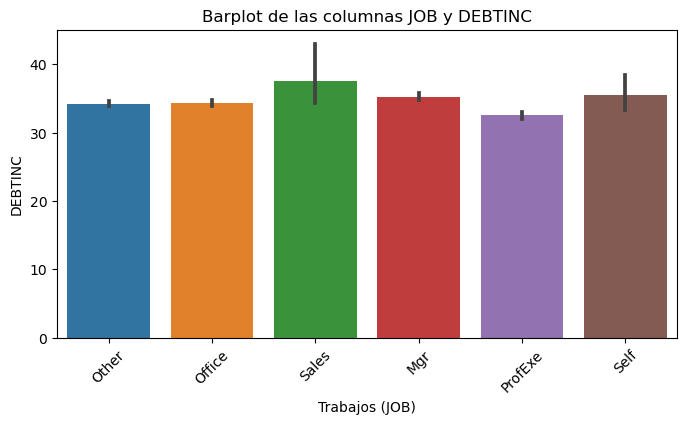

In [8]:

plt.figure(figsize=(8, 4))
sns.barplot(x='JOB', y='DEBTINC', data=df2[['JOB','DEBTINC']])


plt.xticks(rotation=45)
plt.title('Barplot de las columnas JOB y DEBTINC')
plt.xlabel('Trabajos (JOB)')
plt.ylabel('DEBTINC')
plt.show()

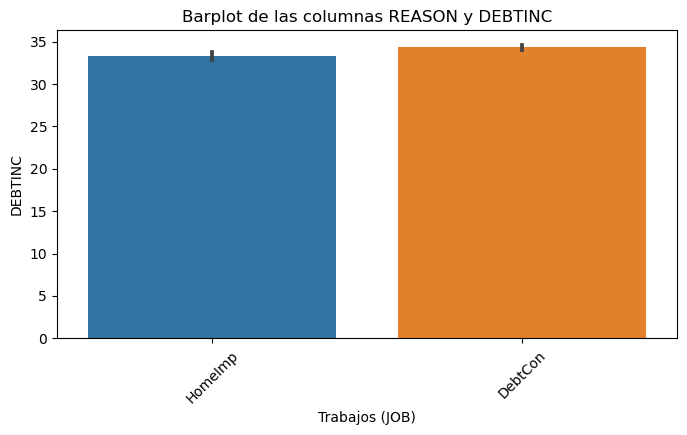

In [9]:
plt.figure(figsize=(8, 4))
sns.barplot(x='REASON', y='DEBTINC', data=df2[['REASON','DEBTINC']])


plt.xticks(rotation=45)
plt.title('Barplot de las columnas REASON y DEBTINC')
plt.xlabel('Trabajos (JOB)')
plt.ylabel('DEBTINC')
plt.show()



In [10]:
#Vamos a hacer drop de las columnas JOB y REASON
df2.drop(['JOB','REASON'],axis=1,inplace=True)

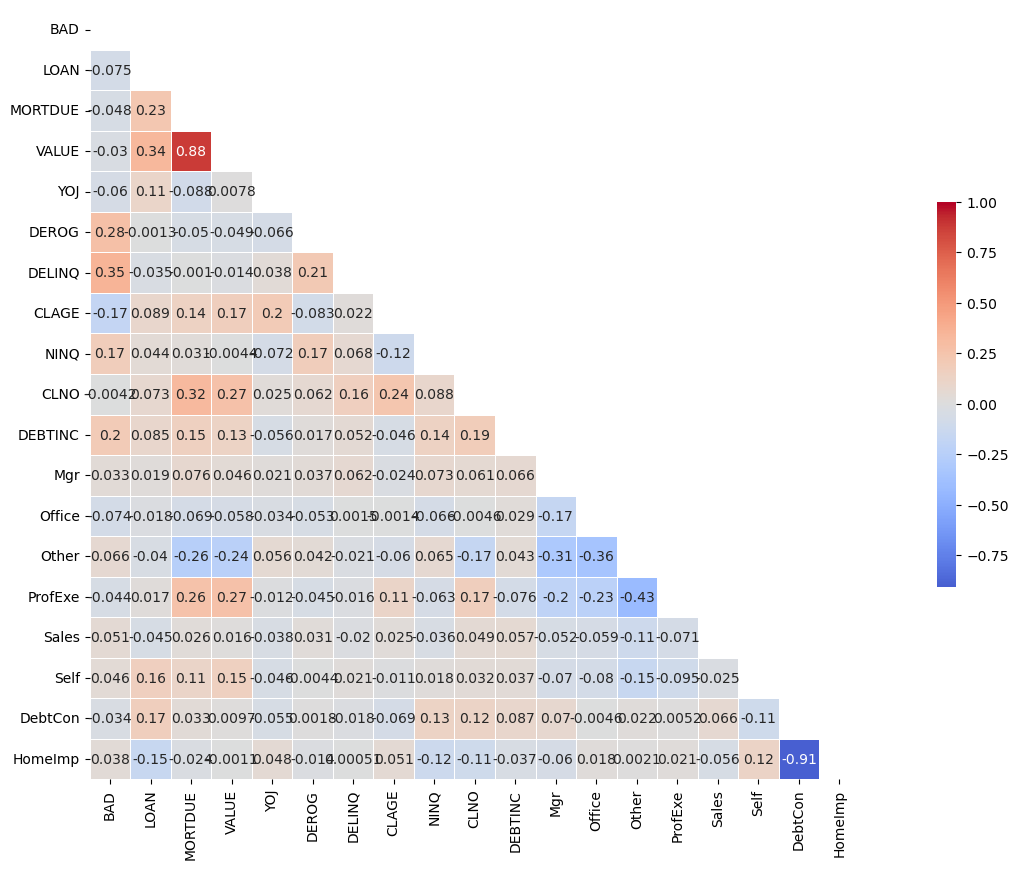

In [11]:
corr = df2._get_numeric_data().corr()  # matriz de correlación

fig, ax = plt.subplots(figsize=(20, 10))

mask = np.triu(np.ones_like(corr, dtype=bool))  # máscara para la matriz triangular superior

# mapa de color coolwarm
color_map = "coolwarm"

# mapa de calor de correlación
sns.heatmap(corr,                      # datos
            mask=mask,                 # máscara blanca
            cmap=color_map,            # color
            vmax=1,                    # borde vertical
            center=0,                  # centro del gráfico
            square=True,               # representación cuadrada de los datos
            linewidth=.5,              # ancho de línea
            cbar_kws={'shrink': .5},   # barra lateral de la leyenda
            annot=True,                # valor de correlación
            ax=ax                      # ejes para el tamaño del gráfico
           )

plt.show()

De este mapa de correlacion la que destaca sigue siendo Value con Mortdue y en el caso de los trabajos el de ProfExe que tiene
0,27 de correlacion en las dos


Vamos a proceder con la primera prueba que consiste en unos datos sin NaN

In [12]:
df_noNan=df2.dropna().copy()


En anteriores pruebas consideramos que el modelo de clasificacion mas correcto para la prediccion era el RandomForest
vamos primero a usar la misma metodologia que la ultima vez para ver que nos acercamos a una presicion optima
y luego haremos el metodo grid para ver cual seria la configuracion optima del random forest

El primer paso sera crear y llamar a la funcion antes definida donde le pasamos como parametro X e y los otros dos parametros
son booleanos para decidir si configurar la normalizacion de datos y el stratify en y

In [13]:
#Definimos la X y la y(objetivo)
X=df_noNan.drop('BAD',axis=1)
y=df_noNan['BAD']




In [15]:
#Hacemos las llamadas a la funcion definida con las diferentes configuraciones
print('------------------------------------------------------------------')
ArbolRandom(X,y,1,1,0.20,42)
print('------------------------------------------------------------------')
ArbolRandom(X,y,1,0,0.20,42)
print('------------------------------------------------------------------')
ArbolRandom(X,y,0,1,0.20,42)
print('------------------------------------------------------------------')
ArbolRandom(X,y,0,0,0.20,42)
print('------------------------------------------------------------------')

------------------------------------------------------------------
MODELO NORMALIZADO CON STRATIFY EN Y
Jaccard Index: 0.6790227661719537
Exactitud: 0.9473684210526315
Precisión: 0.9548542625465701
Sensibilidad: 0.7088973881535907
F1-score: 0.7780877547712284
ROC AUC: 0.7088973881535907
------------------------------------------------------------------
MODELO NORMALIZADO SIN STRATIFY EN Y
Jaccard Index: 0.6508903467666354
Exactitud: 0.9402560455192034
Precisión: 0.94976401179941
Sensibilidad: 0.6838316855558235
F1-score: 0.7507092198581562
ROC AUC: 0.6838316855558235
------------------------------------------------------------------
MODELO SIN NORMALIZADO CON STRATIFY EN Y
Jaccard Index: 0.674326767532591
Exactitud: 0.9473684210526315
Precisión: 0.9727138643067846
Sensibilidad: 0.7016129032258065
F1-score: 0.7733305447352139
ROC AUC: 0.7016129032258065
------------------------------------------------------------------
MODELO SIN NORMALIZADO CON STRATIFY EN Y
Jaccard Index: 0.6426247771

El modelo que mayor F1 nos devuelve es el modelo sin normalizar los datos con stratify en y

In [16]:
ArbolRandom(X,y,0,1,0.20,45)

MODELO SIN NORMALIZADO CON STRATIFY EN Y
Jaccard Index: 0.691854361519374
Exactitud: 0.9502133712660028
Precisión: 0.974112426035503
Sensibilidad: 0.717741935483871
F1-score: 0.790083011270081
ROC AUC: 0.717741935483871


Vamos a comprobar que el modelo no esta sobre entrenado

In [17]:
X=df_noNan.drop('BAD',axis=1)
y=df_noNan['BAD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify=y)
model = RandomForestClassifier()
model.fit(X_train, y_train) 
yhat = model.predict(X_test)

In [18]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
f1_train = f1_score(y_train, y_train_pred, average='macro')
f1_test = f1_score(y_test, y_test_pred, average='macro')
print(f'F1-score en Conjunto de Entrenamiento: {f1_train}')
print(f'F1-score en Conjunto de Prueba: {f1_test}')

F1-score en Conjunto de Entrenamiento: 1.0
F1-score en Conjunto de Prueba: 0.7646758280479211


Comprobamos que la respuesta hacia datos desconocidos es muy inferior a los datos entrenados intentaremos antes de hacer el grid
obtener una diferencia menor

In [20]:
model_regularized = RandomForestClassifier(max_depth=11)
model_regularized.fit(X_train, y_train)
yhat = model_regularized.predict(X_test)
y_train_pred_regularized = model_regularized.predict(X_train)
y_test_pred_regularized = model_regularized.predict(X_test)
f1_train_regularized = f1_score(y_train, y_train_pred_regularized, average='macro')
f1_test_regularized = f1_score(y_test, y_test_pred_regularized, average='macro')
print(f'F1-score en Conjunto de Entrenamiento con max_depth = 11: {f1_train_regularized}')
print(f'F1-score en Conjunto de Prueba con max_depth=11: {f1_test_regularized}')

F1-score en Conjunto de Entrenamiento con max_depth = 11: 0.8445018016711976
F1-score en Conjunto de Prueba con max_depth=11: 0.7467761688639147


No conseguimos que la diferencia entre la prediccion de datos desconocido y del train sean diferentes a metodo de prueba
voy a cargar la funcion que probe en el notebook anterior ya que al cambiar el mapeado por dummies ha cambiado la presicion del modelo
a mal pero eso no significa mas que hay que tambien volver a probar el resto de metodos ya utilizados a fin de ver de que manera el dummies le afecta

In [21]:
X=df_noNan.drop('BAD',axis=1)
y=df_noNan['BAD']
print('------------------------------------------------------------------')
VecinosKneighbors(X,y,1,1,0.20,42)
print('------------------------------------------------------------------')
VecinosKneighbors(X,y,1,0,0.20,42)
print('------------------------------------------------------------------')
VecinosKneighbors(X,y,0,1,0.20,42)
print('------------------------------------------------------------------')
VecinosKneighbors(X,y,0,0,0.20,42)
print('------------------------------------------------------------------')

------------------------------------------------------------------
MODELO NORMALIZADO CON STRATIFY EN Y
Jaccard Index: 0.5197691197691198
Exactitud: 0.9075391180654339
Precisión: 0.679156010230179
Sensibilidad: 0.570504755674098
F1-score: 0.593044485015808
ROC AUC: 0.570504755674098
------------------------------------------------------------------
MODELO NORMALIZADO SIN STRATIFY EN Y
Jaccard Index: 0.49648366606170596
Exactitud: 0.9018492176386913
Precisión: 0.6521086780210867
Sensibilidad: 0.5452254641909814
F1-score: 0.5582602518919214
ROC AUC: 0.5452254641909814
------------------------------------------------------------------
MODELO SIN NORMALIZADO CON STRATIFY EN Y
Jaccard Index: 0.5197691197691198
Exactitud: 0.9075391180654339
Precisión: 0.679156010230179
Sensibilidad: 0.570504755674098
F1-score: 0.593044485015808
ROC AUC: 0.570504755674098
MODELO SIN NORMALIZADO CON STRATIFY EN Y
------------------------------------------------------------------
MODELO SIN NORMALIZADO CON STRA

In [22]:
print('------------------------------------------------------------------')
RegresionLogistica(X,y,1,1,0.20,42)
print('------------------------------------------------------------------')
RegresionLogistica(X,y,1,0,0.20,42)
print('------------------------------------------------------------------')
RegresionLogistica(X,y,0,1,0.20,42)
print('------------------------------------------------------------------')
RegresionLogistica(X,y,0,0,0.20,42)
print('------------------------------------------------------------------')

------------------------------------------------------------------
MODELO NORMALIZADO CON STRATIFY EN Y
Jaccard Index: 0.45590327169274536
Exactitud: 0.9118065433854907
Precisión: 0.45590327169274536
Sensibilidad: 0.5
F1-score: 0.4769345238095238
ROC AUC: 0.5
------------------------------------------------------------------
MODELO NORMALIZADO SIN STRATIFY EN Y
Jaccard Index: 0.45376955903271693
Exactitud: 0.9075391180654339
Precisión: 0.45376955903271693
Sensibilidad: 0.5
F1-score: 0.47576435495898584
ROC AUC: 0.5
------------------------------------------------------------------
MODELO SIN NORMALIZADO CON STRATIFY EN Y
Jaccard Index: 0.45590327169274536
Exactitud: 0.9118065433854907
Precisión: 0.45590327169274536
Sensibilidad: 0.5
F1-score: 0.4769345238095238
MODELO SIN NORMALIZADO CON STRATIFY EN Y
ROC AUC: 0.5
------------------------------------------------------------------
MODELO SIN NORMALIZADO CON STRATIFY EN Y
Jaccard Index: 0.45376955903271693
Exactitud: 0.9075391180654339
P

In [23]:
print('------------------------------------------------------------------')
nearestCentroid(X,y,1,1,0.20,42)
print('------------------------------------------------------------------')
nearestCentroid(X,y,1,0,0.20,42)
print('------------------------------------------------------------------')
nearestCentroid(X,y,0,1,0.20,42)
print('------------------------------------------------------------------')
nearestCentroid(X,y,0,0,0.20,42)
print('------------------------------------------------------------------')

------------------------------------------------------------------
MODELO NORMALIZADO CON STRATIFY EN Y
Jaccard Index: 0.23599319183019624
Exactitud: 0.41536273115220484
Precisión: 0.513977526162292
Sensibilidad: 0.5410019626591516
F1-score: 0.3604465074274027
ROC AUC: 0.5410019626591516
------------------------------------------------------------------
MODELO NORMALIZADO SIN STRATIFY EN Y
Jaccard Index: 0.2223407468335722
Exactitud: 0.3911806543385491
Precisión: 0.5096688741721854
Sensibilidad: 0.5264046298529057
F1-score: 0.3458815958815959
ROC AUC: 0.5264046298529057
------------------------------------------------------------------
MODELO SIN NORMALIZADO CON STRATIFY EN Y
Jaccard Index: 0.23599319183019624
Exactitud: 0.41536273115220484
Precisión: 0.513977526162292
Sensibilidad: 0.5410019626591516
F1-score: 0.3604465074274027
ROC AUC: 0.5410019626591516
------------------------------------------------------------------
MODELO SIN NORMALIZADO CON STRATIFY EN Y
Jaccard Index: 0.22234

In [24]:
print('------------------------------------------------------------------')
ArbolDecision(X,y,1,1,0.20,42,4)
print('------------------------------------------------------------------')
ArbolDecision(X,y,1,0,0.20,42,4)
print('------------------------------------------------------------------')
ArbolDecision(X,y,0,1,0.20,42,4)
print('------------------------------------------------------------------')
ArbolDecision(X,y,0,0,0.20,42,4)
print('------------------------------------------------------------------')

------------------------------------------------------------------
MODELO NORMALIZADO CON STRATIFY EN Y
Jaccard Index: 0.7195327654550054
Exactitud: 0.9487908961593172
Precisión: 0.8772416885087598
Sensibilidad: 0.7752377837048966
F1-score: 0.8163425253991292
ROC AUC: 0.7752377837048966
------------------------------------------------------------------
MODELO NORMALIZADO SIN STRATIFY EN Y
Jaccard Index: 0.6592087042532147
Exactitud: 0.9345661450924608
Precisión: 0.844686438059932
Sensibilidad: 0.7152399324813118
F1-score: 0.7611810232777976
ROC AUC: 0.7152399324813118
------------------------------------------------------------------
MODELO SIN NORMALIZADO CON STRATIFY EN Y
Jaccard Index: 0.7081023454157782
Exactitud: 0.9473684210526315
Precisión: 0.880535701127404
Sensibilidad: 0.7598887826480801
F1-score: 0.8061903449098049
ROC AUC: 0.7598887826480801
------------------------------------------------------------------
MODELO SIN NORMALIZADO CON STRATIFY EN Y
Jaccard Index: 0.673928571

In [32]:
modelos = [LogisticRegression(), KNeighborsClassifier(), RadiusNeighborsClassifier(),
           GaussianNB(), NearestCentroid(), SVC(), DecisionTreeClassifier(), RandomForestClassifier()]

In [34]:
for modelo in modelos:
    
    try:
        model = AdaBoostClassifier(base_estimator = modelo, n_estimators = 50, algorithm = "SAMME")
        model.fit(X_train, y_train)
        
        yhat = model.predict(X_test)
        
        print(modelo)
        print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
        print("Accuracy:"     , accuracy_score(y_test, yhat))
        print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
        print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
        print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))
        print("ROC AUC:"      , roc_auc_score(y_test, yhat))
        
        print("*"*100)
    except:
        continue

LogisticRegression()
Jaccard Index: 0.45590327169274536
Accuracy: 0.9118065433854907
Precisión: 0.45590327169274536
Sensibilidad: 0.5
F1-score: 0.4769345238095238
ROC AUC: 0.5
****************************************************************************************************
GaussianNB()
Jaccard Index: 0.5510532302985133
Accuracy: 0.914651493598862
Precisión: 0.7337802522440632
Sensibilidad: 0.603542851391475
F1-score: 0.636329148848117
ROC AUC: 0.603542851391475
****************************************************************************************************
SVC()
Jaccard Index: 0.45590327169274536
Accuracy: 0.9118065433854907
Precisión: 0.45590327169274536
Sensibilidad: 0.5
F1-score: 0.4769345238095238
ROC AUC: 0.5
****************************************************************************************************
DecisionTreeClassifier()
Jaccard Index: 0.7063987063987064
Accuracy: 0.9416785206258891
Precisión: 0.8298258345428157
Sensibilidad: 0.7859065975542248
F1-score: 0.80585

In [29]:
print( [i for i in range(1, 20)])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [ ]:
#Hacer una grid para visualizar cual es la mejor configuracion para nuestro RandomForest con los datos que estamos tratando

In [30]:
%%time

model = AdaBoostClassifier()

params = {"n_estimators"   : [i for i in range(1, 20)],
          "base_estimator" : [LogisticRegression(),
                              KNeighborsClassifier(),
                              RadiusNeighborsClassifier(),
                              GaussianNB(),
                              NearestCentroid(),
                              SVC(),
                              DecisionTreeClassifier(),
                              RandomForestClassifier()],
          "algorithm"      : ["SAMME", "SAMME.R"],
          "learning_rate"  : [1/(10**i) for i in range(1, 4)]}

scorers = ("f1_macro", "accuracy", "recall_macro", "roc_auc")

grid_solver = GridSearchCV(estimator  = model    , 
                           param_grid = params   , 
                           scoring    = scorers  ,
                           cv         = 5        ,
                           refit      = "roc_auc",
                           n_jobs     = -1        )

model_result = grid_solver.fit(X, y)

print(model_result.cv_results_["mean_test_recall_macro"].mean())
print(model_result.cv_results_["mean_test_f1_macro"].mean())
print(model_result.cv_results_["mean_test_accuracy"].mean())
print(model_result.cv_results_["mean_test_roc_auc"].mean())

print("*"*100)

print(model_result.best_score_)
print(model_result.best_params_)

nan
nan
nan
nan
****************************************************************************************************
0.8445072512815159
{'algorithm': 'SAMME.R', 'base_estimator': RandomForestClassifier(), 'learning_rate': 0.1, 'n_estimators': 17}
CPU times: total: 9.64 s
Wall time: 8min 58s


In [58]:
X=df_noNan.drop('BAD',axis=1)
y=df_noNan['BAD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify=y)
model_regularized = RandomForestClassifier(criterion='log_loss',
                                           max_depth=12,
                                           max_features=4,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           )
model_regularized.fit(X_train, y_train)
yhat = model_regularized.predict(X_test)
y_train_pred_regularized = model_regularized.predict(X_train)
y_test_pred_regularized = model_regularized.predict(X_test)
f1_train_regularized = f1_score(y_train, y_train_pred_regularized, average='macro')
f1_test_regularized = f1_score(y_test, y_test_pred_regularized, average='macro')
print(f'F1-score en Conjunto de Entrenamiento con max_depth = 11: {f1_train_regularized}')
print(f'F1-score en Conjunto de Prueba con max_depth=11: {f1_test_regularized}')

F1-score en Conjunto de Entrenamiento con max_depth = 11: 0.9062864791598852
F1-score en Conjunto de Prueba con max_depth=11: 0.7646758280479211


In [59]:
model.feature_importances_


array([0.06784666, 0.06895248, 0.08479398, 0.04839535, 0.04914987,
       0.1070557 , 0.10431379, 0.0521366 , 0.07335091, 0.27513056,
       0.00702652, 0.01132682, 0.0088731 , 0.00824497, 0.01161677,
       0.00579242, 0.00771469, 0.0082788 ])

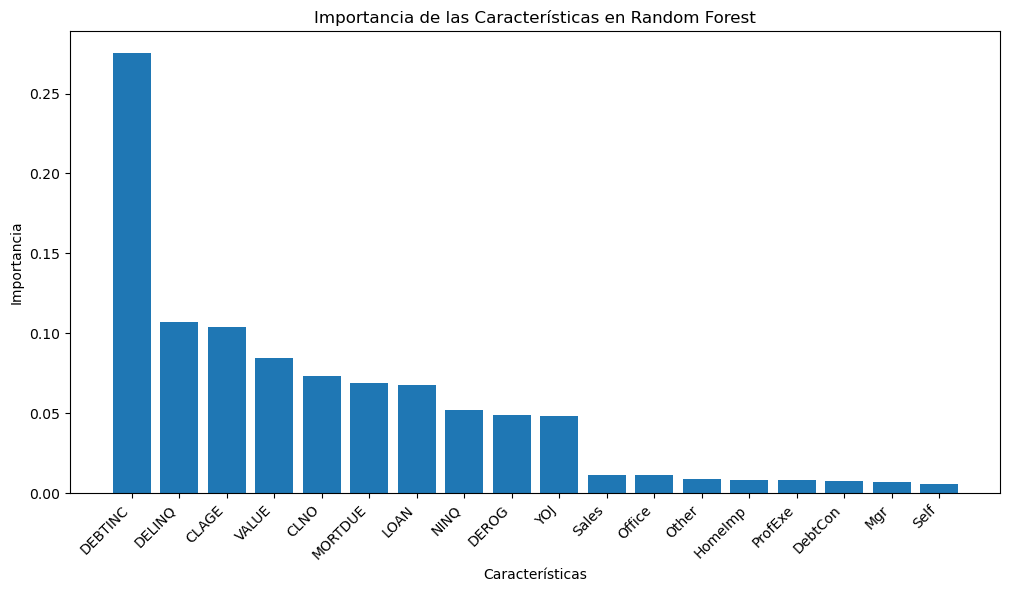

In [60]:
feature_importances = model.feature_importances_
feature_names = X_train.columns  
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(12, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las Características en Random Forest')
plt.xticks(rotation=45, ha='right')
plt.show()

In [61]:
confusion_matrix(y_test, yhat, labels = [0, 1])

array([[641,   0],
       [ 38,  24]], dtype=int64)

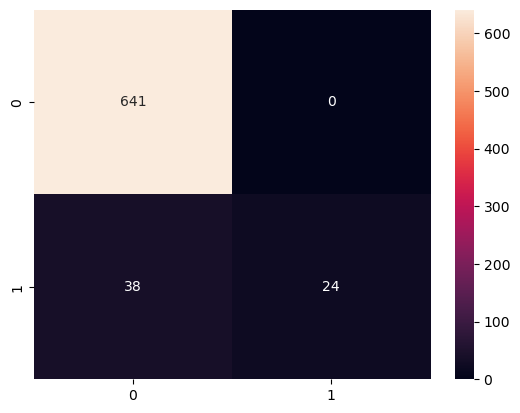

In [62]:
sns.heatmap(confusion_matrix(y_test, yhat, labels = [0, 1]), annot=True, fmt='d');

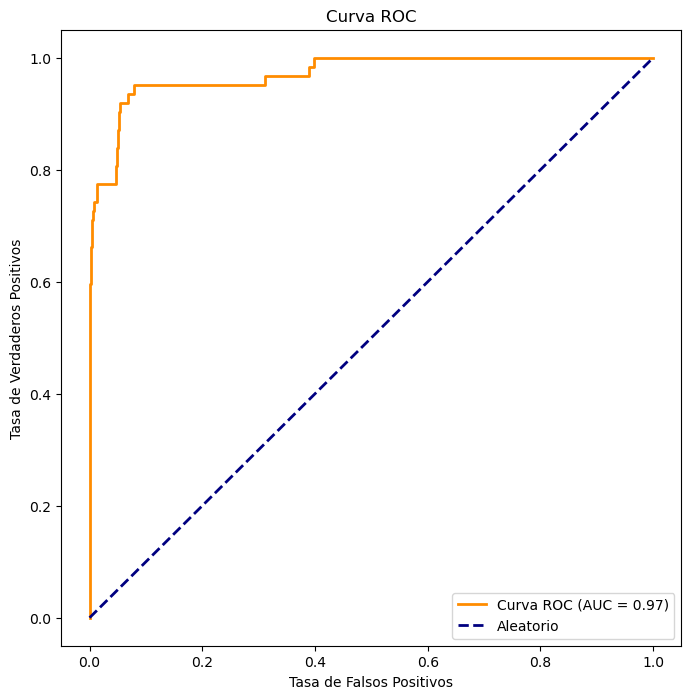

In [63]:
# Obtén las probabilidades predichas para la clase positiva
y_prob = model_regularized.predict_proba(X_test)[:, 1]

# Calcula la curva ROC
fpr, tpr, umbrales = roc_curve(y_test, y_prob)

# Calcula el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [64]:
#Metricas finales del modelo elegido
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Exactitud:"    , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))
print("ROC AUC:", roc_auc_score(y_test, yhat))




Jaccard Index: 0.665566060145375
Exactitud: 0.9459459459459459
Precisión: 0.9720176730486009
Sensibilidad: 0.6935483870967742
F1-score: 0.7646758280479211
ROC AUC: 0.6935483870967742


In [65]:
df1.shape,df_noNan.shape

((5960, 13), (3515, 19))

* PARTE 2 DEL EJERCICIO -> EVALIACION DEL MODELO CON TRATAMIENTO SOBRE LOS NAN

In [ ]:
df2

Partiremos de la base del df2 que tiene el dummies hecho en las categoricas y esta vez despues de ordenar usaremos k-imputers

In [88]:
df3=df2.copy()

In [89]:
df3 = df3.sort_values(by=['BAD','DEBTINC'])
df3 = df3.reset_index(drop=True)

In [90]:
df3.head(2)

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,Mgr,Office,Other,ProfExe,Sales,Self,DebtCon,HomeImp
0,0,12100,NaN,72731.0,0.0,0.0,0.0,NaN,0.0,0.0,0.720295,0,0,0,0,0,0,0,0
1,0,13200,NaN,69139.0,0.0,1.0,0.0,NaN,0.0,1.0,1.565931,0,0,0,0,0,0,0,0


In [91]:
df3.tail(10)

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,Mgr,Office,Other,ProfExe,Sales,Self,DebtCon,HomeImp
5950,1,50000,167000.0,245000.0,22.0,1.0,7.0,267.900000,2.0,24.0,NaN,0,0,0,0,0,1,0,1
5951,1,50000,80286.0,145000.0,12.0,NaN,1.0,178.766599,0.0,35.0,NaN,0,0,1,0,0,0,1,0
5952,1,50000,160000.0,235000.0,0.3,0.0,0.0,184.700000,0.0,41.0,NaN,0,0,0,1,0,0,1,0
5953,1,56800,95321.0,169000.0,3.0,0.0,0.0,239.433333,4.0,38.0,NaN,0,0,1,0,0,0,1,0
5954,1,60000,86573.0,159920.0,7.0,0.0,5.0,332.733333,3.0,22.0,NaN,0,0,0,1,0,0,1,0
5955,1,61400,46126.0,83800.0,33.0,0.0,1.0,339.900000,1.0,23.0,NaN,0,0,1,0,0,0,0,0
5956,1,63300,202000.0,281000.0,2.0,0.0,0.0,99.433333,2.0,21.0,NaN,0,0,0,1,0,0,1,0
5957,1,72300,NaN,85000.0,1.0,0.0,0.0,117.166667,9.0,23.0,NaN,0,0,1,0,0,0,1,0
5958,1,76500,38206.0,90000.0,12.0,0.0,0.0,134.900000,0.0,26.0,NaN,0,0,1,0,0,0,1,0
5959,1,77200,83962.0,215000.0,8.0,1.0,2.0,71.533132,3.0,14.0,NaN,0,0,0,0,0,1,0,1


In [71]:
df2.isna().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
Mgr           0
Office        0
Other         0
ProfExe       0
Sales         0
Self          0
DebtCon       0
HomeImp       0
dtype: int64

HEMOS ORDENADO POR DEBTINC POR QUE LO CONSIDERO SEGUN FEATURE IMPORTANCE SIN NAN, UNA VARIABLE DE LA MAS IMPORTANTE CLARO DESPUES DE LA VARIABLE OBJETIVO BAD POR LO QUE PARA RELLENAR LOS NAN HE DECIDIDO HACERLO POR LA MEDIA DE CERCACNIA ESTA VEZ CON K IMPUTER

In [92]:
knn_imputer = KNNImputer(metric='nan_euclidean',weights='distance',n_neighbors=5)
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df3), columns=df3.columns)


In [93]:
df_imputed.sort_values(by=['BAD','DEBTINC'],inplace=True)
df_imputed.tail(10)

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,Mgr,Office,Other,ProfExe,Sales,Self,DebtCon,HomeImp
5164,1.0,26800.0,138216.0,170052.0,10.0,0.00000,0.000000,199.738711,1.0,29.0,76.421478,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5165,1.0,18200.0,95091.0,113294.0,15.0,0.00000,3.000000,188.504617,0.0,36.0,78.654386,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5166,1.0,19600.0,94419.0,123705.0,19.0,0.18747,2.000000,92.739380,0.0,22.0,84.379034,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5167,1.0,27700.0,61396.0,111627.0,20.0,0.00000,0.000000,87.002500,0.0,4.0,84.613889,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5168,1.0,13900.0,144263.0,167164.0,8.0,2.00000,6.000000,111.588603,5.0,38.0,91.612600,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5169,1.0,37300.0,68789.0,86172.0,2.0,0.00000,6.000000,235.637906,2.0,25.0,114.050528,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5170,1.0,23000.0,58577.0,69327.0,4.0,0.00000,2.000000,110.414480,2.0,33.0,133.528270,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5171,1.0,20500.0,113963.0,131135.0,3.0,1.00000,0.000000,243.680604,1.0,26.0,143.949605,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5172,1.0,65500.0,205156.0,290239.0,2.0,0.00000,0.000000,98.808206,1.0,21.0,144.189001,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5173,1.0,23300.0,103783.0,132612.0,1.0,0.00000,0.285213,120.347967,0.0,19.0,203.312149,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [76]:
df_imputed.isna().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
Mgr        0
Office     0
Other      0
ProfExe    0
Sales      0
Self       0
DebtCon    0
HomeImp    0
dtype: int64

PODRIAMOS TRATAR LOS NAN RESTANTES PERO EN ESTA OCASION VAMOS A DROPEARLOS A VER CUANTOS DATOS NOS QUEDAN

In [30]:
df2.dropna(inplace=True)

In [94]:
print(f'Dimension de los datos originales: {df1.shape}')
print(f'Dimension de los datos con nan tratados: {df2.shape}')

Dimension de los datos originales: (5960, 13)
Dimension de los datos con nan tratados: (5960, 19)


Hemos perdido 800 datos aprox pero tenemos una buena cantidad para trabajar

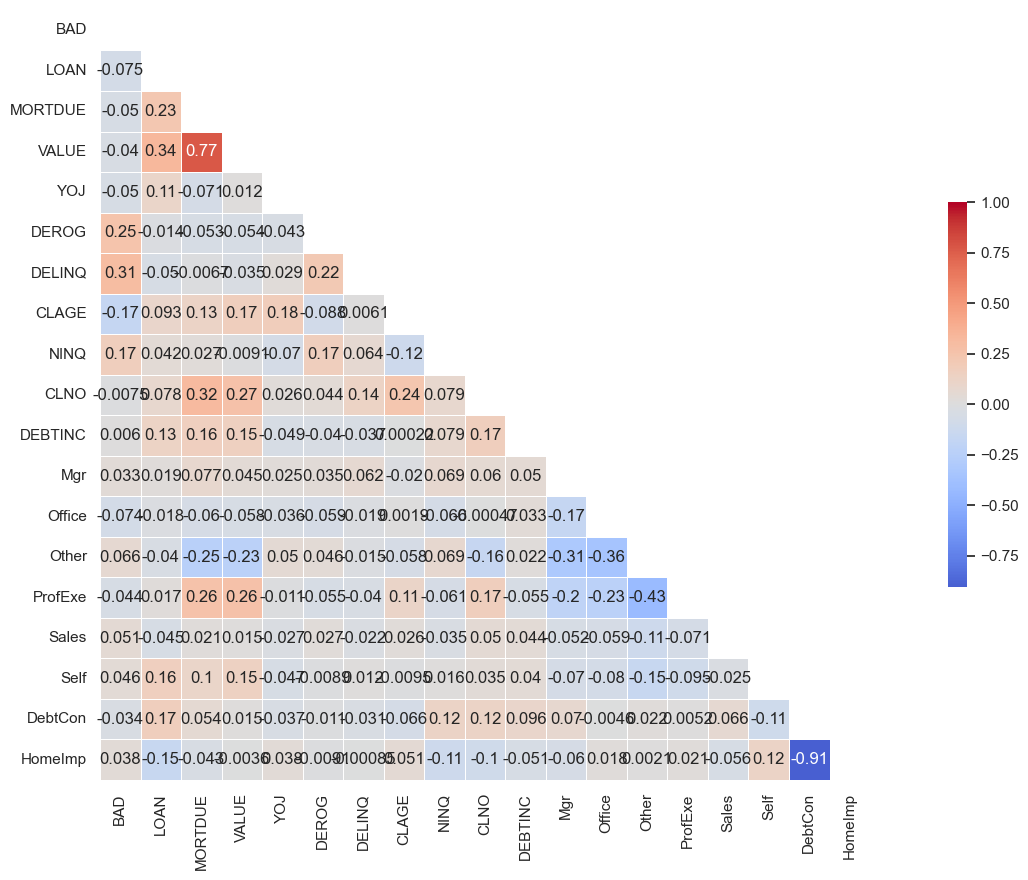

In [95]:
# Vamos a ver la correlacion

corr = df_imputed._get_numeric_data().corr()  # matriz de correlación

fig, ax = plt.subplots(figsize=(20, 10))

mask = np.triu(np.ones_like(corr, dtype=bool))  # máscara para la matriz triangular superior

# mapa de color coolwarm
color_map = "coolwarm"

# mapa de calor de correlación
sns.heatmap(corr,                      # datos
            mask=mask,                 # máscara blanca
            cmap=color_map,            # color
            vmax=1,                    # borde vertical
            center=0,                  # centro del gráfico
            square=True,               # representación cuadrada de los datos
            linewidth=.5,              # ancho de línea
            cbar_kws={'shrink': .5},   # barra lateral de la leyenda
            annot=True,                # valor de correlación
            ax=ax                      # ejes para el tamaño del gráfico
           )

plt.show()

In [96]:
X=df_imputed.drop('BAD', axis=1)
y=df_imputed.BAD
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify=y)

In [97]:
model_regularized = RandomForestClassifier(max_depth=15)
model_regularized.fit(X_train, y_train)
yhat = model_regularized.predict(X_test)
y_train_pred_regularized = model_regularized.predict(X_train)
y_test_pred_regularized = model_regularized.predict(X_test)
f1_train_regularized = f1_score(y_train, y_train_pred_regularized, average='macro')
f1_test_regularized = f1_score(y_test, y_test_pred_regularized, average='macro')
print(f'F1-score en Conjunto de Entrenamiento con max_depth = 3: {f1_train_regularized}')
print(f'F1-score en Conjunto de Prueba con max_depth=3: {f1_test_regularized}')

F1-score en Conjunto de Entrenamiento con max_depth = 3: 0.9296505242155491
F1-score en Conjunto de Prueba con max_depth=3: 0.8078375439229251


In [84]:
model.feature_importances_

array([0.06784666, 0.06895248, 0.08479398, 0.04839535, 0.04914987,
       0.1070557 , 0.10431379, 0.0521366 , 0.07335091, 0.27513056,
       0.00702652, 0.01132682, 0.0088731 , 0.00824497, 0.01161677,
       0.00579242, 0.00771469, 0.0082788 ])

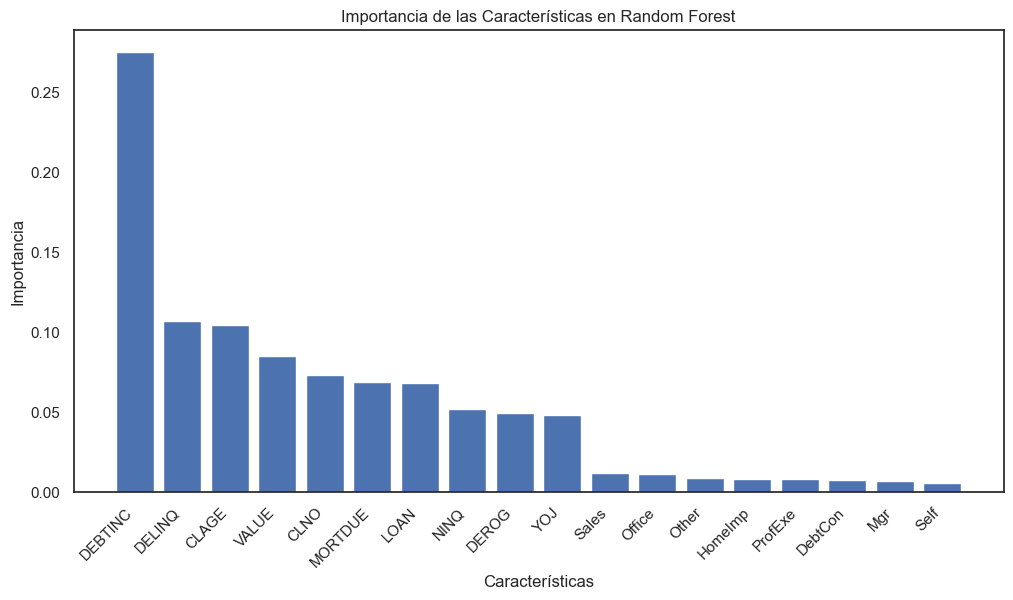

In [85]:
feature_importances = model.feature_importances_
feature_names = X_train.columns  
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(12, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las Características en Random Forest')
plt.xticks(rotation=45, ha='right')
plt.show()

In [39]:
confusion_matrix(y_test, yhat, labels = [0, 1])

array([[815,   0],
       [ 58, 156]], dtype=int64)

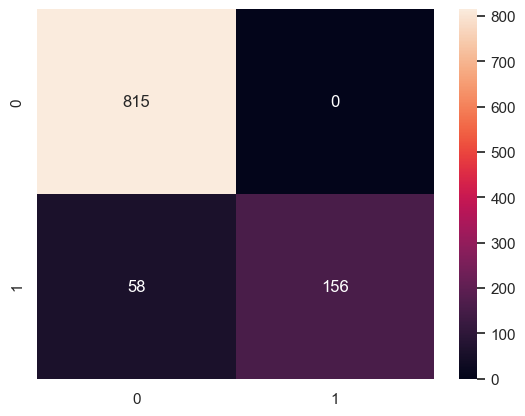

In [40]:
sns.heatmap(confusion_matrix(y_test, yhat, labels = [0, 1]), annot=True, fmt='d');

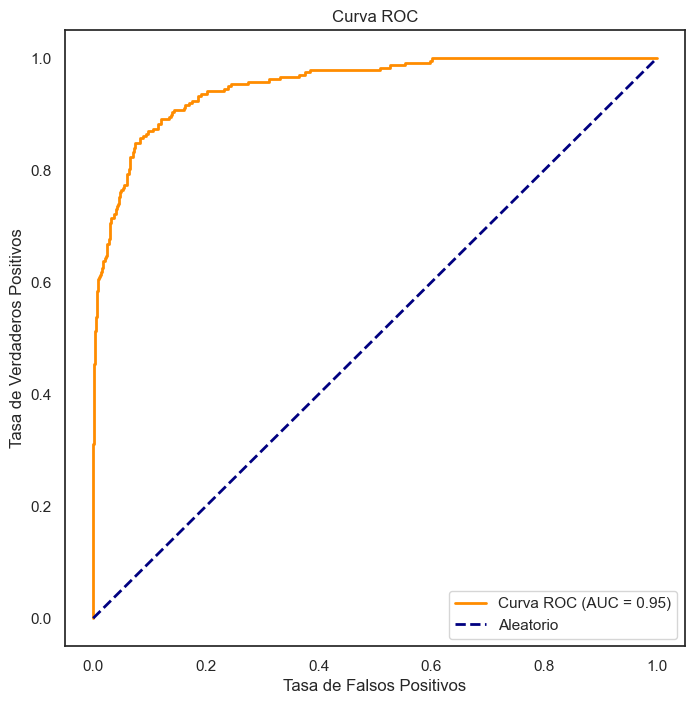

In [86]:
# Obtén las probabilidades predichas para la clase positiva
y_prob = model_regularized.predict_proba(X_test)[:, 1]

# Calcula la curva ROC
fpr, tpr, umbrales = roc_curve(y_test, y_prob)

# Calcula el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [87]:
#Metricas finales del modelo elegido
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Exactitud:"    , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))
print("ROC AUC:", roc_auc_score(y_test, yhat))


Jaccard Index: 0.7093331322132492
Exactitud: 0.9035234899328859
Precisión: 0.9292672190390991
Sensibilidad: 0.7662870179518348
F1-score: 0.8164491452459284
ROC AUC: 0.7662870179518347


Conclusion del ejercicio:
